Brief PCA analysis of the N16 and N8 templates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from modules.galaxyphoto import Sed

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

Load the N16 templates

In [36]:
N16_x, N16_y = [], []
for i in range(16):
    template = "N16-"+str(i+1)
    x,y = np.loadtxt('templates/'+template+'.sed',unpack=True)
    N16_x = x
    N16_y.append(y)
N16_x, N16_y = np.array(N16_x), np.array(N16_y)

Perform PCA on the N16 templates

In [30]:
pca = PCA(n_components=2, svd_solver='randomized').fit(N16_y)

Plot the components and projections

In [31]:
N16_y_trans = pca.transform(N16_y)

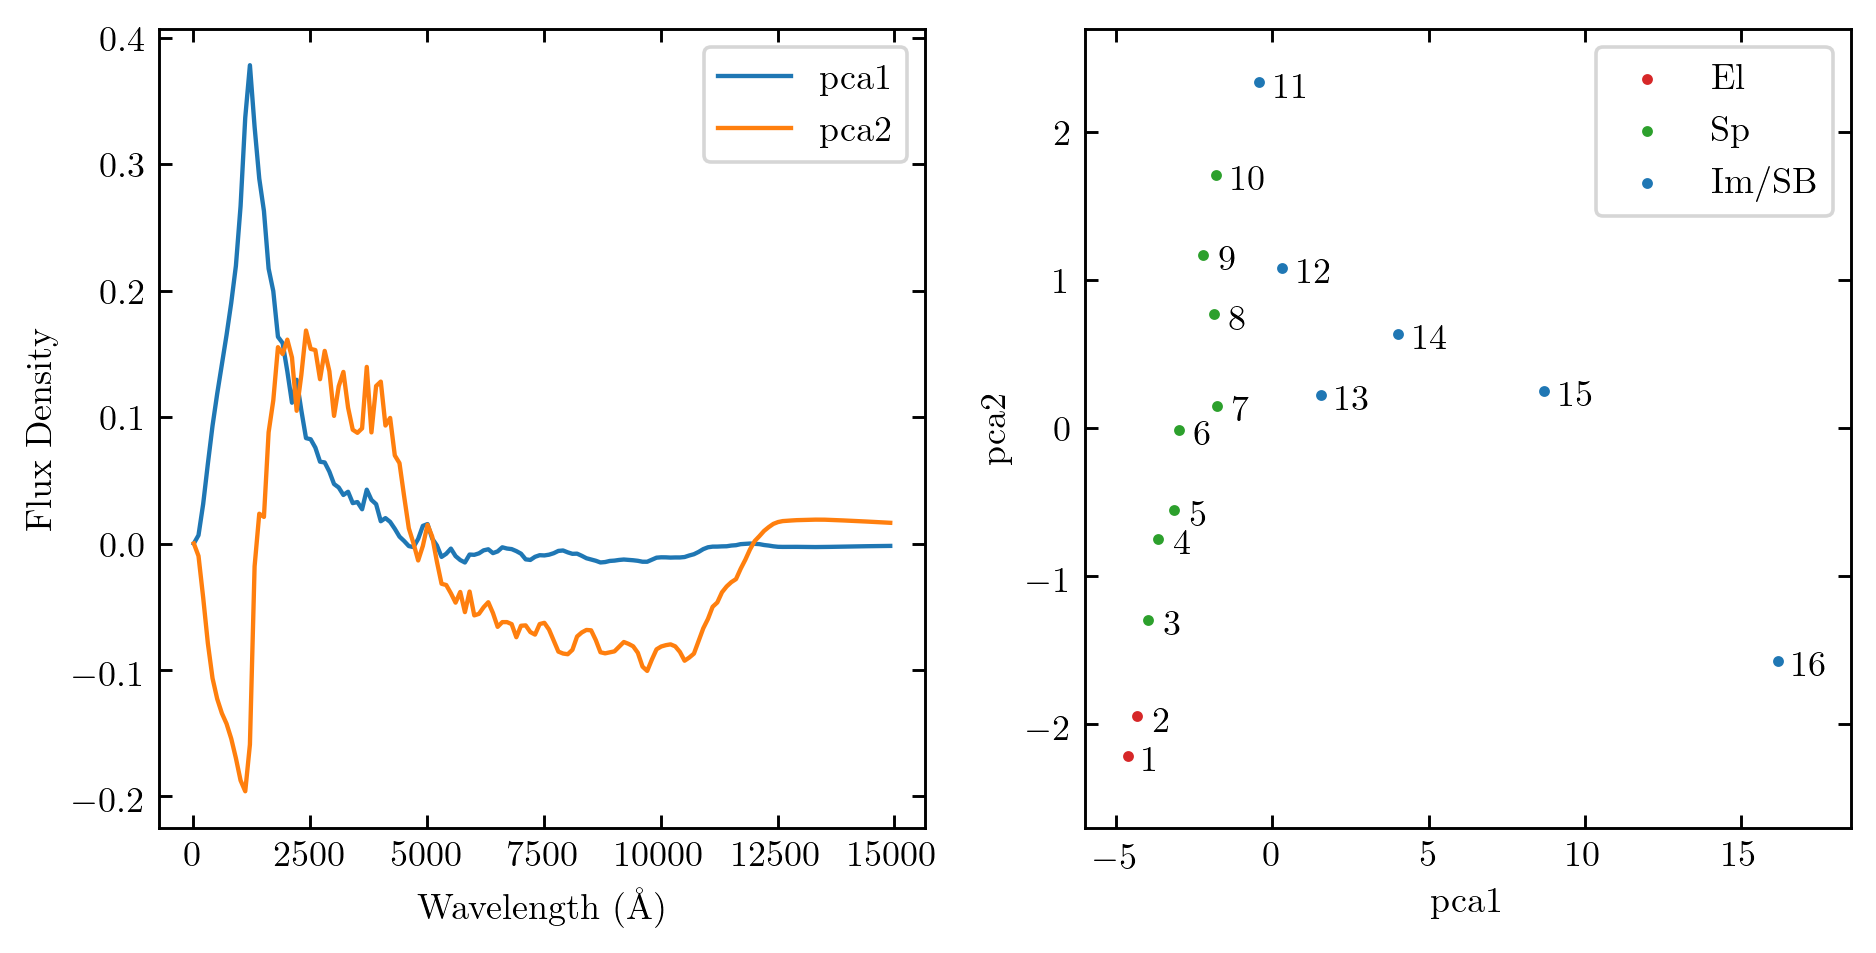

In [43]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(twocol,twocol/2),constrained_layout=True)

#for y in pca.components_:
ax1.plot(N16_x,pca.components_[0],label='pca1')
ax1.plot(N16_x,pca.components_[1],label='pca2')
ax1.legend()

ax1.set_xlabel("Wavelength ($\mathrm{\AA}$)")
ax1.set_ylabel("Flux Density")

for i,x in enumerate(N16_y_trans):
    if i+1 <= 2:
        c = 'C3'
    elif i+1 <= 10:
        c = 'C2'
    else:
        c = 'C0'
    ax2.scatter(x[0],x[1],c=c)
    ax2.annotate(i+1,(x[0]+0.5,x[1]-0.1))
    
ax2.scatter([-10],[-10],c='C3',label='El')
ax2.scatter([-10],[-10],c='C2',label='Sp')
ax2.scatter([-10],[-10],c='C0',label='Im/SB')
ax2.legend()
    
ax2.set_xlabel('pca1')
ax2.set_ylabel('pca2')

ax2.set_xlim(-6,18.5)
ax2.set_ylim(-2.7,2.7)
plt.show()

fig.savefig("plots/N16_pca.png")

Project the N8 templates onto the same components

In [38]:
N8_x, N8_y = [], []
for i in range(8):
    template = "N8-"+str(i+1)
    x,y = np.loadtxt('templates/'+template+'.sed',unpack=True)
    N8_x = x
    N8_y.append(y)
N8_x, N8_y = np.array(N8_x), np.array(N8_y)

In [39]:
N8_y_trans = pca.transform(N8_y)

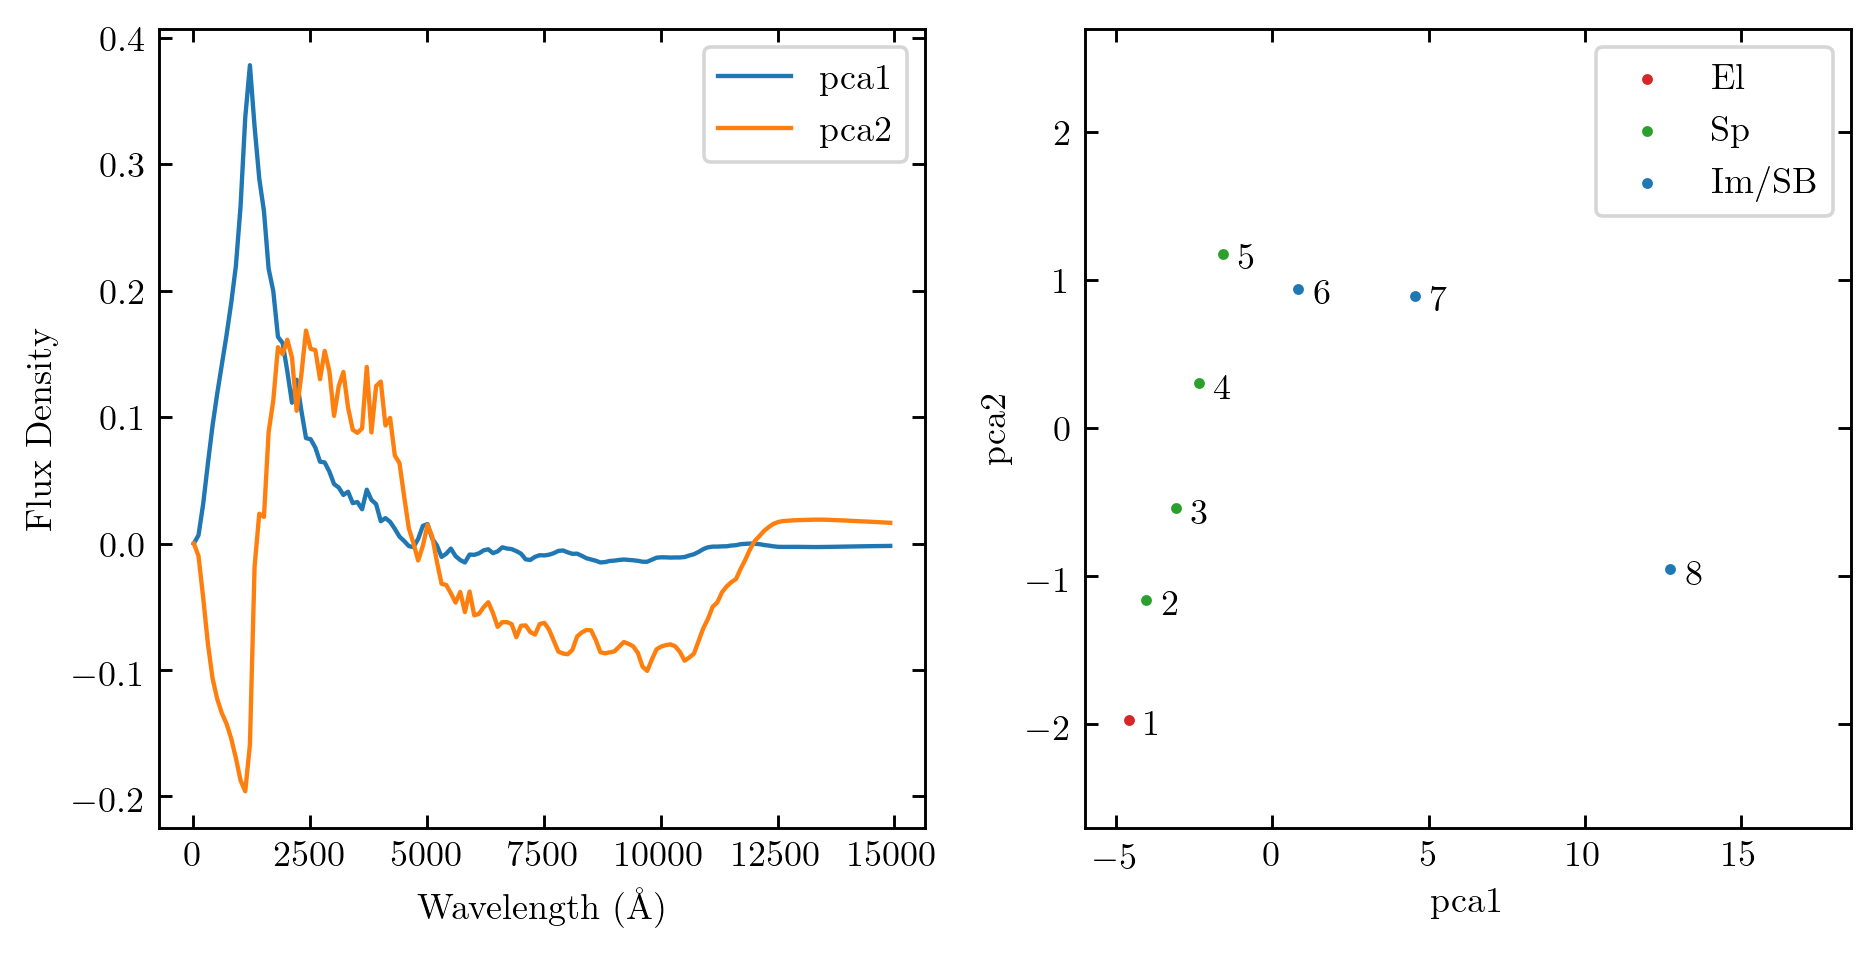

In [40]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(twocol,twocol/2),constrained_layout=True)

#for y in pca.components_:
ax1.plot(N8_x,pca.components_[0],label='pca1')
ax1.plot(N8_x,pca.components_[1],label='pca2')
ax1.legend()

ax1.set_xlabel("Wavelength ($\mathrm{\AA}$)")
ax1.set_ylabel("Flux Density")

for i,x in enumerate(N8_y_trans):
    if i+1 <= 1:
        c = 'C3'
    elif i+1 <= 5:
        c = 'C2'
    else:
        c = 'C0'
    ax2.scatter(x[0],x[1],c=c)
    ax2.annotate(i+1,(x[0]+0.5,x[1]-0.1))
    
ax2.scatter([-10],[-10],c='C3',label='El')
ax2.scatter([-10],[-10],c='C2',label='Sp')
ax2.scatter([-10],[-10],c='C0',label='Im/SB')
ax2.legend()
    
ax2.set_xlabel('pca1')
ax2.set_ylabel('pca2')

ax2.set_xlim(-6,18.5)
ax2.set_ylim(-2.7,2.7)
plt.show()